# Basic Concepts
## Definition
Linear regression is a statistical technique used to model the relationship between two variables, where one variable is considered the dependent variable and the other is considered the independent variable. The goal of linear regression is to find the line of best fit that represents the relationship between these two variables.
## Equation
The equation of a simple linear regression can be represented as:
$$
y = \beta_0 + \beta_1x + \epsilon
$$
Where $y$ is the dependent variable, $x$ is the independent variable, $\beta_0$ is the intercept or constant term, $\beta_1$ is the slope or coefficient of the independent variable, and $\epsilon$ is the error term.

This equation represents a straight line with slope $\beta_1$ and y-intercept $\beta_0$ that is used to model the relationship between $x$ and $y$ in the data. The error term represents the variability in the data that is not explained by the linear relationship between $x$ and $y$.


#Calculation Method
##Method of Least Squares
The method of least squares is a mathematical optimization technique used to fit a linear regression model to a given set of data. The goal of the method is to find the line of best fit that minimizes the sum of the squared distances between the observed data points and the predicted values of the model.

To accomplish this, the method of least squares calculates the residuals, which are the differences between the observed values of the dependent variable and the predicted values of the model. The method then squares each of these residuals and adds them up to obtain the sum of the squared residuals (SSR).
$$
SSR = \sum_{i=1}^{n}(y_i - \hat{y_i})^2
$$
The line of best fit is then determined by finding the values of the intercept and slope that minimize the SSR. This is done by taking partial derivatives of the SSR with respect to the intercept and slope, setting them equal to zero, and solving for the intercept and slope that minimize the SSR.
$$
\hat{\beta_1} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}
$$

$$
\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}
$$

Once the intercept and slope have been determined, the linear regression model can be used to predict the value of the dependent variable for any given value of the independent variable. 

#Linear regression coding
Below are simple implementations of a function that, by means of the method of least squares, calculates the linear function of a data set.
##Python


In [1]:
#@title Main Function

import numpy as np

def simple_linear_regression(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    numerator = 0
    denominator = 0
    
    for i in range(n):
        numerator += (x[i] - x_mean) * (y[i] - y_mean)
        denominator += (x[i] - x_mean) ** 2
    
    beta_1 = numerator / denominator
    beta_0 = y_mean - beta_1 * x_mean
    
    return (beta_0, beta_1)

In [2]:
#@title Implementation with preset data
# Generate some example data
x = np.array([-3.12328482e+00 ,2.35568892e+0,-3.05170052e+00,6.89517723e+00,-1.62936305e+00,-8.77796322e-01,3.49002578e+00,1.49656536e+01,-1.45014322e+01,-5.28506514e-03])
y = np.array([6.03185439,-9.98202078,12.15041551,-6.67516491,-2.72505777,14.16774481,-7.82608958,-2.50320697,-3.08314461,17.2968803])

# Fit a linear regression model
beta_0, beta_1 = simple_linear_regression(x, y)

# Print the results
print("Intercept: ", beta_0)
print("Slope: ", beta_1)

Intercept:  1.8252951480990747
Slope:  -0.3100573722353745


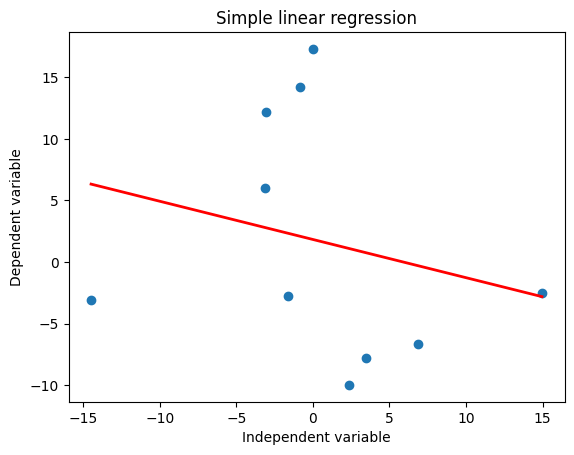

In [3]:
#@title Graph
import matplotlib.pyplot as plt

# Create a scatter plot of the data points
plt.scatter(x, y)

# Add the regression line to the plot
x_min, x_max = np.min(x), np.max(x)
y_min, y_max = beta_0 + beta_1*x_min, beta_0 + beta_1*x_max
plt.plot([x_min, x_max], [y_min, y_max], 'r-', linewidth=2)

# Add axis labels and a title
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.title('Simple linear regression')

# Display the plot
plt.show()

Intercept:  0.2631
Slope:  0.119


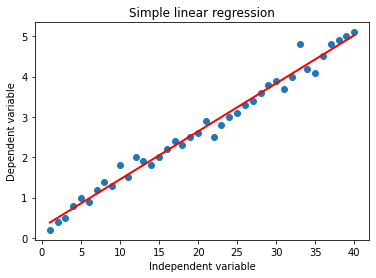

In [ ]:
#@title Retrieving Data from a CSV File
#@markdown Before executing the cell make sure you upload the file and put its name in the box

# Import libraries
import pandas as pd

#Data input
file_name = 'data.csv' #@param {type:"string"}
separator = ';' #@param [";", ","]

# Load data 
data = pd.read_csv(file_name, sep = separator)
x = data["x"] # Independent variables
y = data["y"] # Dependent variable

# Fit a linear regression model
beta_0, beta_1 = simple_linear_regression(x, y)

# Create a scatter plot of the data points
plt.scatter(x, y)

# Add the regression line to the plot
x_min, x_max = np.min(x), np.max(x)
y_min, y_max = beta_0 + beta_1*x_min, beta_0 + beta_1*x_max
plt.plot([x_min, x_max], [y_min, y_max], 'r-', linewidth=2)

# Add axis labels and a title
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.title('Simple linear regression')

# Print the results
print("Intercept: ", round(beta_0,4))
print("Slope: ", round(beta_1,4))

# Display the plot
plt.show()

Intercept:  0.2631
Slope:  0.119


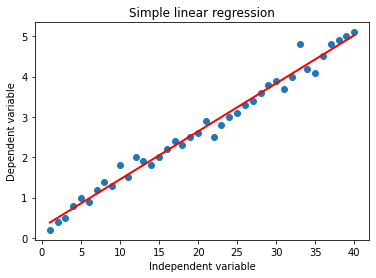

In [ ]:
#@title Retrieving Data from a SQL Database
#@markdown Before executing the cell make sure you upload the file and put its name in the box

import sqlite3

#Data input
file_name = 'MyData.db' #@param {type:"string"}
table_name = 'MyData' #@param {type:"string"}
x_column_name = 'x_column' #@param {type:"string"}
y_column_name = 'y_column' #@param {type:"string"}

# Connect to SQLite database file
conn = sqlite3.connect(file_name)

# Query database and load data into pandas dataframe
df = pd.read_sql_query(f"SELECT {x_column_name}, {y_column_name} FROM {table_name}", conn)

# Extract independent and dependent variables
x = df['x_column'].values
y = df['y_column'].values

# Fit a linear regression model
beta_0, beta_1 = simple_linear_regression(x, y)

# Create a scatter plot of the data points
plt.scatter(x, y)

# Add the regression line to the plot
x_min, x_max = np.min(x), np.max(x)
y_min, y_max = beta_0 + beta_1*x_min, beta_0 + beta_1*x_max
plt.plot([x_min, x_max], [y_min, y_max], 'r-', linewidth=2)

# Add axis labels and a title
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.title('Simple linear regression')

# Print the results
print("Intercept: ", round(beta_0,4))
print("Slope: ", round(beta_1,4))

# Display the plot
plt.show()

Intercept:  2.0857
Slope:  0.7


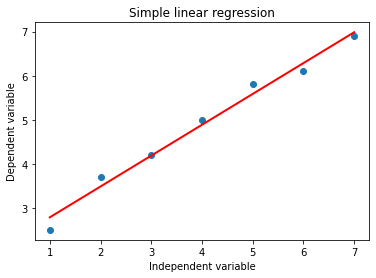

In [ ]:
#@title Using Scikit-Learn Library

from sklearn.linear_model import LinearRegression

# Generate some example data
x = np.array([1, 2, 3, 4, 5, 6, 7]).reshape(-1, 1)
y = np.array([2.5, 3.7, 4.2, 5.0, 5.8, 6.1, 6.9]).reshape(-1, 1)

# Create a LinearRegression object
lr = LinearRegression()

# Fit the model to the data
lr.fit(x, y)

# Get the slope and intercept of the model
beta_0 = lr.intercept_[0]
beta_1 = lr.coef_[0][0]

# Create a scatter plot of the data points
plt.scatter(x, y)

# Add the regression line to the plot
x_min, x_max = np.min(x), np.max(x)
y_min, y_max = beta_0 + beta_1*x_min, beta_0 + beta_1*x_max
plt.plot([x_min, x_max], [y_min, y_max], 'r-', linewidth=2)

# Add axis labels and a title
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.title('Simple linear regression')

# Print the results
print("Intercept: ", round(beta_0,4))
print("Slope: ", round(beta_1,4))

# Display the plot
plt.show()